In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
from scipy import signal
import soundfile as sf
import librosa
import librosa.display
import sys

In [20]:
epsilon = sys.float_info.epsilon # small positive value to avoid zeros inside the log

# A function to plot signal
def plot_signal(s, i):
    plt.figure()
    plt.plot(time_axis[i*hop_size:(i*hop_size+win_size)],s)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
# A function to plot spectrogram   
def plot_spectrogram (spec, if_truncate=False):
    plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(spec,origin='lower',aspect='auto')
    locs, labels = plt.xticks()
    locs_=[np.round((i/locs[-1]*len(audio)/sr),decimals=1) for i in locs]
    plt.xticks(locs[1:-1], locs_[1:-1])
    locs, labels = plt.yticks()
    if if_truncate:
      locs_=[int((i/locs[-1]*sr//16)) for i in locs]   # truncate the plot by a factor of 8
    else:
      locs_=[int((i/locs[-1]*sr//2)) for i in locs]
    plt.yticks(locs[1:-1], locs_[1:-1])
    plt.xlabel('Time (s)')
    plt.ylabel('Fre (Hz)')

### 1.  Implement a function to compute power spectrogram. (1 point)

C:\Users\Phan Phuong Uyen\AppData\Local\Temp\ipykernel_22748\3877979562.py:7: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.hamming(win_size, sym=False)


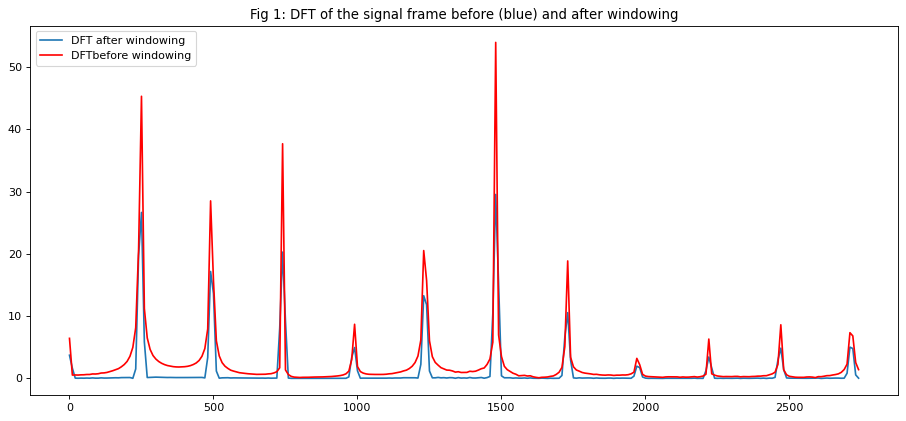

In [24]:
# Read audio
audio, sr = sf.read('audio1.wav')

# Set parameters
win_size = int(0.1*sr)
time_axis = np.linspace(0, len(audio)/fs, len(audio), endpoint=False)
window = signal.hamming(win_size, sym=False)

# b) Add overlap between consecutive signal frames.
hop_size = win_size//2

nfft = win_size
# nframes = int(np.ceil((len(audio) - win_size) / hop_size)) + 1
nframes = int((len(audio)-win_size)/hop_size)+1 
power_spectrogram = np.zeros((nfft//2+1,nframes),dtype=np.float32)   # placeholder for power spectrogram

# Loop through the frames
for i in np.arange(0, nframes):
    # Select audio frame
    segment = audio[i*hop_size:i*hop_size+win_size]  

    # a) Multiply each signal frame with a windowing function.
    segment_wind = window * segment
    
    # DFT spectrum
    spectrum_wind = fft(segment_wind, nfft)
    spectrum_wind = spectrum_wind[:nfft//2+1]

    # spectrum no window
    spectrum = fft(segment, nfft)
    spectrum = spectrum[:nfft//2+1]
    # Select a frame and plot the spectrum with and without windowing.
    if i == 10:           # plot first audio frame
        plt.figure( figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
        t =  np.linspace(0, sr//2, nfft//2+1)

        # spectrumm of windowed signal
        plt.plot(t[:len(t)//8], abs(spectrum_wind[:len(t)//8])) # plot only a part of it for better visibility
        plt.plot(t[:len(t)//8], abs(spectrum[:len(t)//8]), 'r') # plot only a part of it for better visibility
        plt.legend(['DFT after windowing', 'DFTbefore windowing'], loc='upper left')
        plt.title('Fig 1: DFT of the signal frame before (blue) and after windowing')

    power_spectrum = np.power(np.abs(spectrum_wind),2)
    power_spectrogram[:,i] = power_spectrum

#### 1 a) Effect of windowing

Windowing in time domain implies convolution in frequency domain. So the process of windowing by default would lead to changes in the spectral content under analysis. The reason we use a tapering window , e.g., Hann, Hamming, etc.,  is to avoid discontinuities at the window end points and their good frequency domain charecteristics in comparison to the rectangular window. A rectangular window will cause larger spectral smearing which can be seen from Fig. 1.


Text(0.5, 1.0, 'Fig 3: Logrithmic power spectrogram')

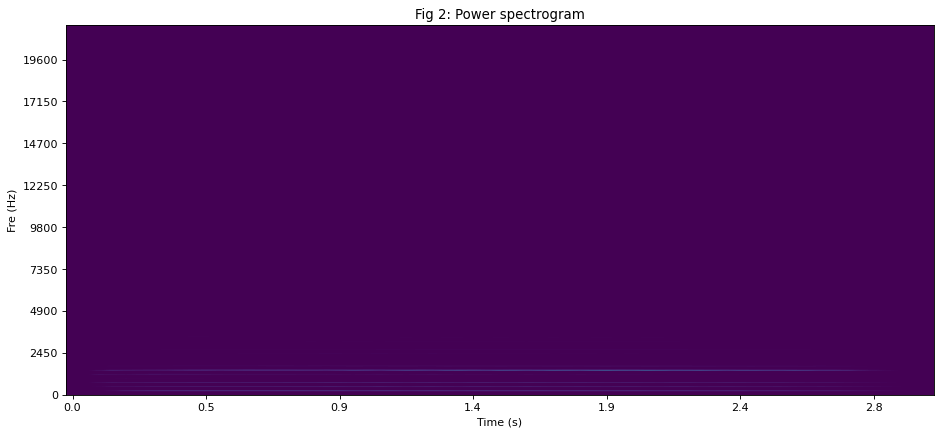

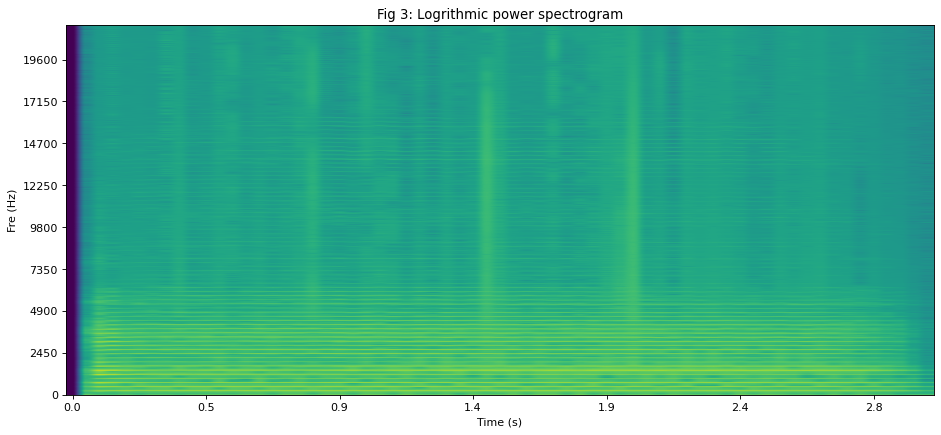

In [25]:
# Plot the power spectrogram
plot_spectrogram(power_spectrogram)
plt.title('Fig 2: Power spectrogram')
plot_spectrogram(20*np.log10(power_spectrogram+epsilon))
plt.title('Fig 3: Logrithmic power spectrogram')

#### What differences do you observe?

In [26]:
# The logarithmic transformation of the spectrogram offers a more perceptually relevant representation by compressing the scale. 
# It's particularly helpful for analyzing and visualizing audio data, as it aligns more closely with how humans perceive sound.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

Text(0.5, 1.0, 'Power spectrogram using librosa library')

<Figure size 1120x480 with 0 Axes>

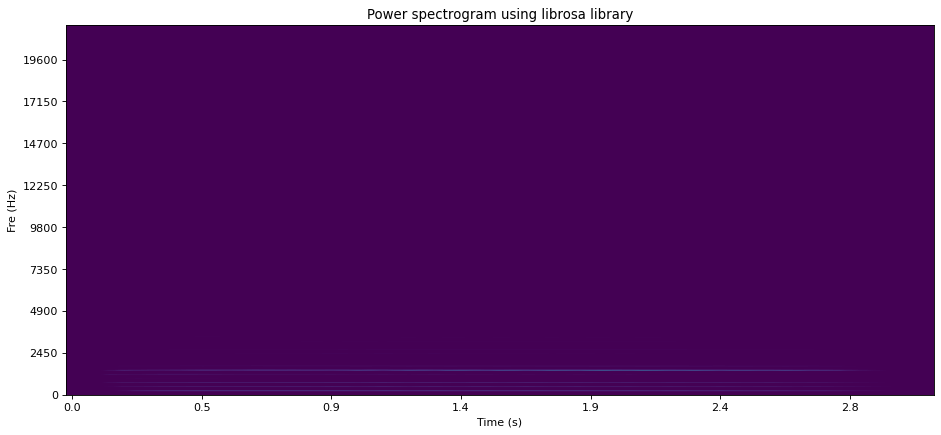

In [28]:
# spectrogram using a library function
spectrogram_librosa = librosa.stft(audio, n_fft=nfft,win_length=win_size,hop_length=hop_size)
plt.figure( figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
plot_spectrogram(np.abs(spectrogram_librosa)**2)
plt.title('Power spectrogram using librosa library')

## b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

C:\Users\Phan Phuong Uyen\AppData\Local\Temp\ipykernel_22748\3134242765.py:11: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.hamming(i,sym= False)
C:\Users\Phan Phuong Uyen\AppData\Local\Temp\ipykernel_22748\3134242765.py:11: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.hamming(i,sym= False)
C:\Users\Phan Phuong Uyen\AppData\Local\Temp\ipykernel_22748\3134242765.py:11: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.hamming(i,s

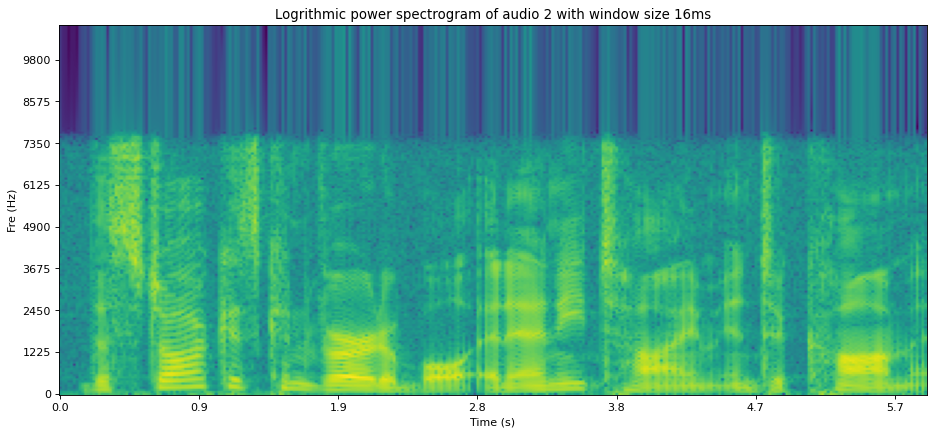

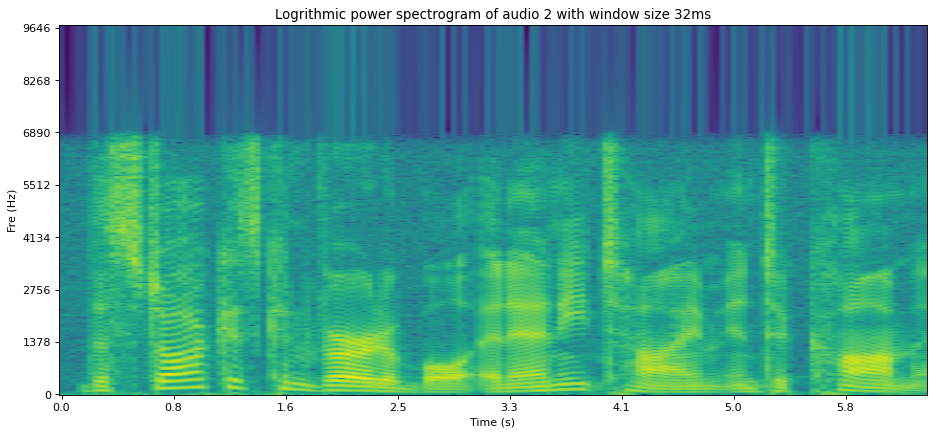

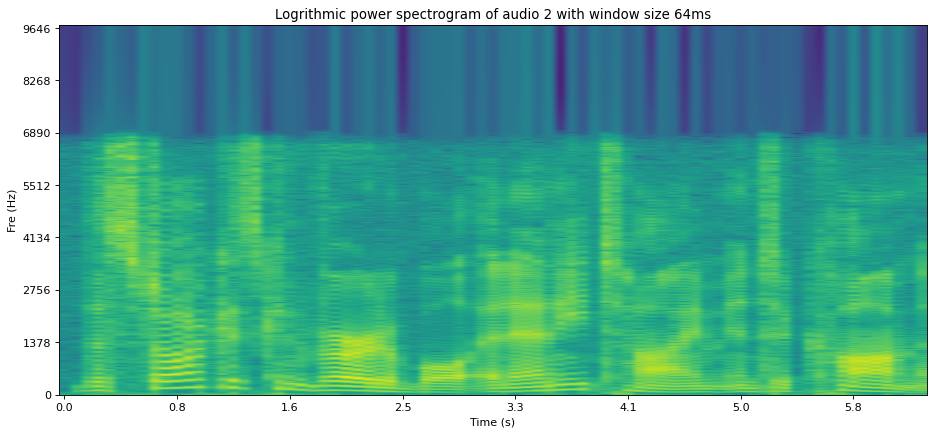

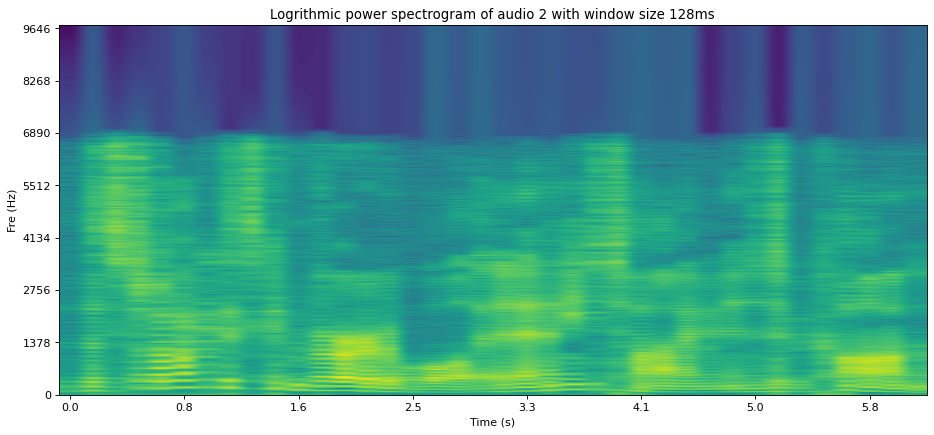

In [30]:
# choose audio
s,sr = sf.read("audio2.wav")

# window lengths
window_length_ms = [16, 32, 64, 128]
window_length= [int(i*0.001*sr) for i in window_length_ms]
time_axis = np.linspace(0, len(s)/sr, len(s), endpoint=False)

for i in window_length:

    window = signal.hamming(i,sym= False)
    hop_size = i//2
    n_fft=i
    n_frames=int((len(s)-i)/hop_size)+1
    power_spectrogram = np.zeros((n_fft//2+1,n_frames),dtype=np.float32)
    for j in np.arange(0,n_frames):
        s_seg = s[j*hop_size:j*hop_size+i]
        s_win_seg = window * s_seg
        spectrum  = fft(s_win_seg,n_fft)
        spectrum=spectrum[:n_fft//2+1]
        power_spectrum = np.power(np.abs(spectrum),2)
        power_spectrogram[:,j] = power_spectrum
    plot_spectrogram(20*np.log10(power_spectrogram+epsilon))
    plt.title('Logrithmic power spectrogram of audio 2'+' with window size '+str(int(np.round((i/sr*1000),decimals=1)))+'ms')


#### c) What happens when the window size is increased?

In [14]:
# time-frequency trade-off. Here are some observations:

# Larger Window Size: Increasing the window size provides better frequency resolution but may result in poorer time resolution.
# Distinguish fine-grained frequency components more accurately, but rapid changes in the signal may not be captured.

# Smaller Window Size: Smaller windows offer better time resolution but may have limited frequency resolution. 
# Rapid changes in the signal can be captured, but it might be challenging to differentiate closely spaced frequencies.

#### What analysis window lenght is best for each of the signal types?

In [15]:
# For music, where changes in pitch and timbre are common, a moderate window size (e.g., 32 ms) might work well.

# For speech, which often has slower changes in pitch and formants, a larger window size (e.g., 64 ms) may be suitable.

# For synthetic sinusoids, the optimal window size may depend on the specific frequencies and changes in the signal. 

### Bonus problem: Implement overlap-add reconstruction